# Tidal Project

## Step 1: Adding & formatting data

import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

import matplotlib style guide

In [2]:
plt.style.use("Downloads/astr19_matplotlib_defaults.txt")

read and open the data

In [3]:
#define the filename
fname = 'Downloads/ASTR19_S22_group_project_data.txt'

#open the file with numpy loadtxt
test_data = np.loadtxt(fname, dtype={'names': ('day', 'time', 'height'),'formats': ('i4', 'S5', 'f4')})

convert data & make a scatter plot

<ErrorbarContainer object of 3 artists>

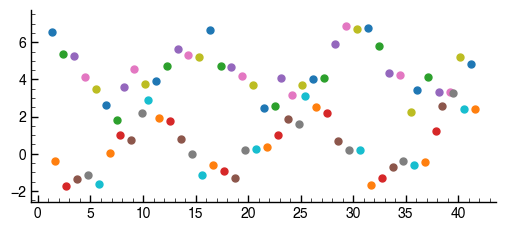

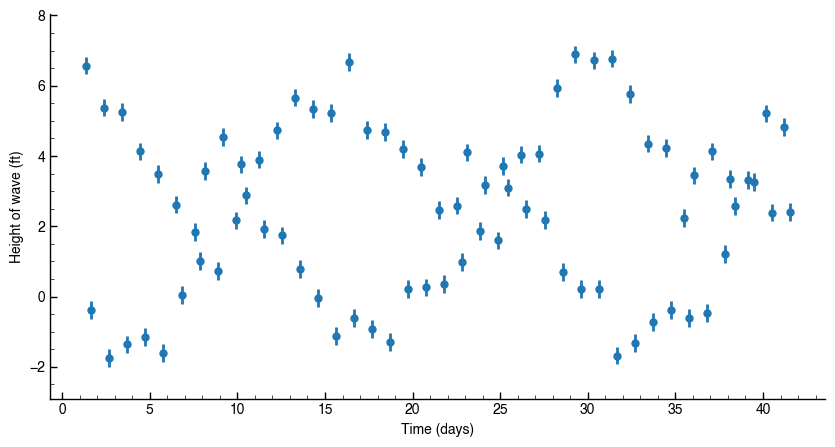

In [4]:
#create empty lists for x and y variables
result_x = []
result_y = []

#format time to be in days then put the x and y values into two separate arrays
for item in test_data:
    day = item [0]
    time = item [1].decode()
    height = item [2]
    Day = (day)
    TimeParts = time.split(":")
    daysfromhour = int(TimeParts[0])/24
    daysfromminutes = int(TimeParts[1])/60/24
    timeindays = day + daysfromhour + daysfromminutes
    x = timeindays
    y = height
    result_x.append(x)
    result_y.append(y)
    plt.scatter(x,y)

#converting result lists into arrays
result_x = np.asarray(result_x)
result_y = np.asarray(result_y)


#create a figure and plot the points
fig = plt.figure(figsize=(10,5))
ax = plt.subplot
plt.xlabel('Time (days)')
plt.ylabel('Height of wave (ft)')
plt.errorbar(result_x, result_y, yerr= 0.25, fmt='o', label='data')

## Step 2: Curve fitting

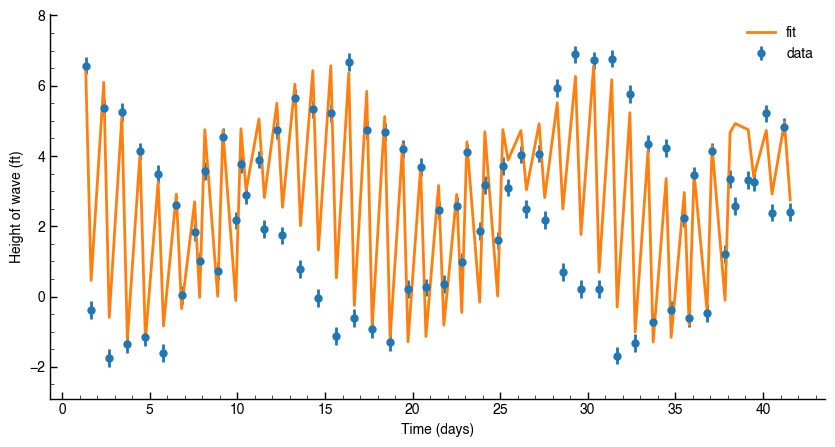

In [5]:
#define the function to fit
def f_line(x, a, b, c,d,e,f):
    return (a * np.sin(((2*np.pi)/1)*x + b+6)) + (1*c * np.sin(((2*np.pi)/0.2)*x + d+6)) * (e * np.sin(((2*np.pi)/0.5)*x + f))

#perform the fit using scipy optimize
params, params_cov = optimize.curve_fit(f_line, result_x, result_y, p0=[3, 0.5, 1, 1, 1, 1,]) 

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]
e_fit = params[4]
f_fit = params[5]


y_fit = (a_fit * np.sin(((np.pi)/0.5)*result_x + b_fit)+2) + (c_fit * np.cos(((2*np.pi)/0.5)*result_x + d_fit)) * (e_fit * np.sin(((2*np.pi)/0.5)*result_x + f_fit))


#plot the fit on the figure
f = plt.figure(figsize=(10,5))
plt.xlabel('Time (days)')
plt.ylabel('Height of wave (ft)')
plt.errorbar(result_x, result_y, yerr=0.25, fmt='o', label='data')
plt.plot(result_x, y_fit, label='fit')
plt.legend(loc=0, frameon=False)

#save the figure as a PDF
plt.savefig('tidal-project-figure.pdf', bbox_inches='tight', dpi=600, facecolor='white')

## Step 3: Plotting residuals and statistical analysis

Calculate and plot the residuals.

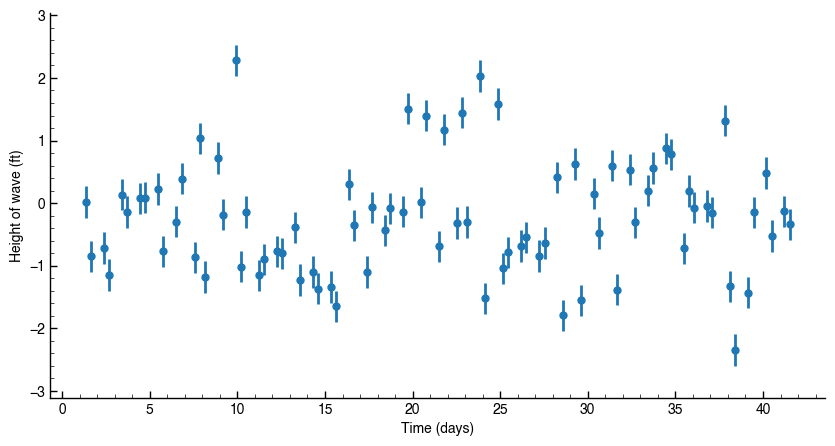

In [6]:
#calculate the residuals
residuals = result_y - y_fit

#make a figure & plot the residuals
plt.figure(figsize=(10,5))
plt.errorbar(result_x, residuals, yerr=0.25, fmt='o', label='residuals')
plt.xlabel('Time (days)')
plt.ylabel('Height of wave (ft)')
plt.show()

Calculate and print the standard deviation of the residuals.

In [7]:
#standard deviation & mean
residuals_std = np.std(residuals)
#residuals_mean = np.mean(residuals)

print(f'Standard Deviation of Residuals: {residuals_std:.4f}')
#print(f'Mean of Residuals: {residuals_mean:.4f}')

Standard Deviation of Residuals: 0.9063


Make a plot and histogram the residuals.

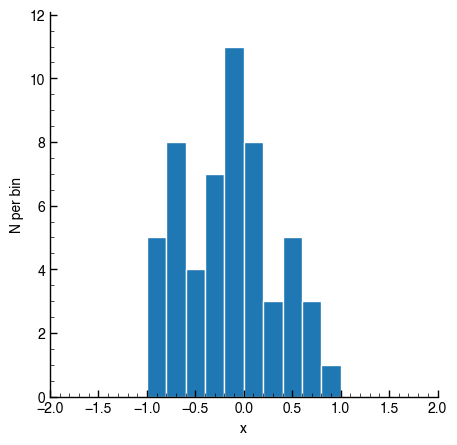

In [8]:
plt.figure(figsize=(5,5))
plt.hist(residuals, bins=10, range=(-1,1), edgecolor='white')
plt.xlim([-2,2])
plt.xlabel('x')
plt.ylabel('N per bin')
plt.savefig('residuals-histogram.pdf', bbox_inches='tight', dpi=400)

## Step 4: Outlier plotting and analysis

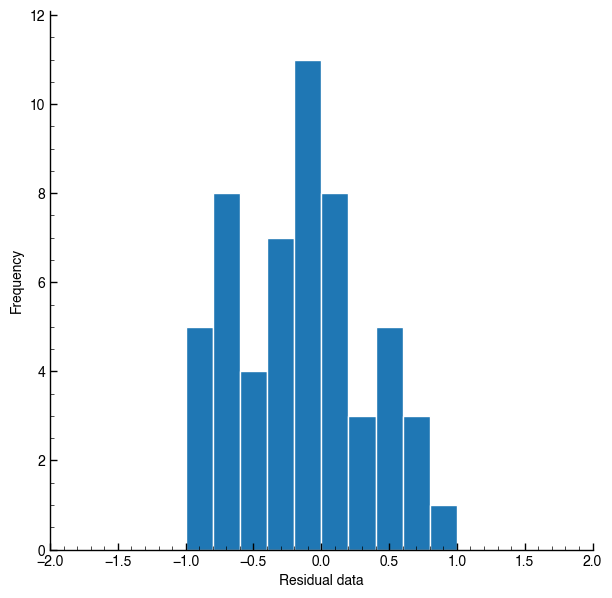

In [9]:
#Add the outlier to the data in an array
outlier_data = np.append([residuals], [2])

#plot a histogram with the new data
plt.figure(figsize=(7, 7))
plt.hist(outlier_data, bins=10, range=(-1,1), edgecolor='white')
plt.xlim([-2,2])
plt.xlabel('Residual data')
plt.ylabel('Frequency')
plt.show()

#where is the outlier?

Calculate how large the tsunami deviation was

In [10]:
#code